# Cardiovascular Diseases Prediction: A Comparison Between Naive Bayes, KNN, and SVM Models

## Proponents: Esocoreal, Giralao, Malabanan, Panogalinog, Pesidas

### A Final Project for the course CMSC 191 - O

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Data Preprocessing

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
# Convert the age from days to years
df['age'] =  df['age'] / 365

In [4]:
# Display the first 5 rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Rename the columns to make features names more clearly understood
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 
                   'gluc': 'glucose', 'alco': 'alcohol', 

                   'cardio': 'cardiovascular disease'}, inplace=True)
# Display the first 5 rows
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Quick summary of statistics to spot possible outliers
df.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Notice that the systolic and diastolic max and min values are unrealistic.
# Only include the systolic values [10,500], and diastolic values [10,400].

In [8]:
# Filter out all rows with systolic outside [10,500], and diastolic outside [10,400]
#df_filtered = df[df['systolic'] > 500 & df['systolic'] < 10]


# Filter out all rows with systolic outside [10,500] using the drop function
df.drop(df[df['systolic'] > 500].index, inplace = True)
df.drop(df[df['systolic'] < 10].index, inplace = True)

# Filter out all rows with diastolic outside [10,400] using the drop function
df.drop(df[df['diastolic'] > 400].index, inplace = True)
df.drop(df[df['diastolic'] < 10].index, inplace = True)

In [9]:
df.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
count,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000,68977.000000
mean,49969.370326,53.325690,1.348667,164.361193,74.119192,126.332198,81.359163,1.364397,1.225930,0.087870,0.053598,0.803268,0.494962
std,28847.584089,6.762012,0.476552,8.196515,14.327943,17.723775,9.773011,0.678692,0.571889,0.283108,0.225223,0.397531,0.499978
min,0.000000,29.583562,1.000000,55.000000,11.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24997.000000,48.375342,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50008.000000,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74862.000000,58.419178,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,401.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Notice now that the maximum and minimum values for diastolic and systolic columns are within
# the desired range

In [11]:
# Drop the id column
df_train = df.drop('id', axis=1)
df_train.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
# Drop the duplicated values too
df_train.duplicated().sum()
df_train.drop_duplicates(inplace=True)

## Some plots 

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


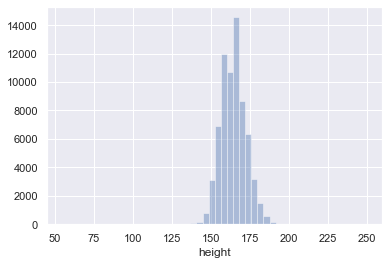

In [13]:
# Plot for heights
sns.distplot(df_train['height'], kde=False)
plt.show()

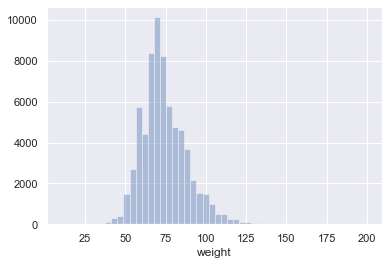

In [14]:
# plot for weights
sns.distplot(df_train['weight'], kde=False)
plt.show()

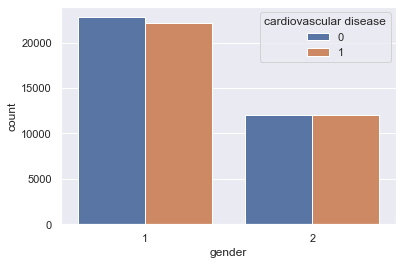

In [15]:
sns.countplot(x='gender', hue='cardiovascular disease', data=df_train)
plt.show()

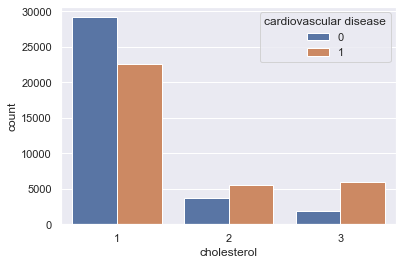

In [16]:
sns.countplot(x='cholesterol', hue='cardiovascular disease', data=df_train)
plt.show()

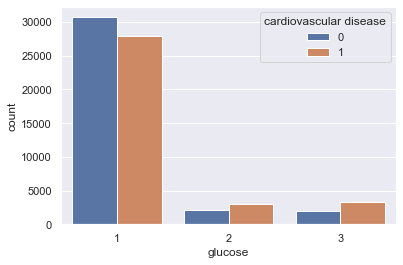

In [17]:
sns.countplot(x='glucose', hue='cardiovascular disease', data=df_train)
plt.show()

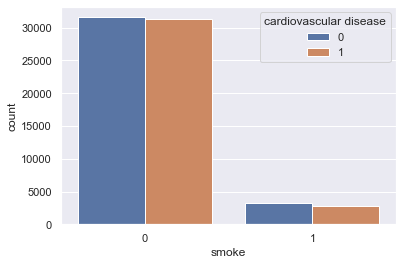

In [18]:
sns.countplot(x='smoke', hue='cardiovascular disease', data=df_train)
plt.show()

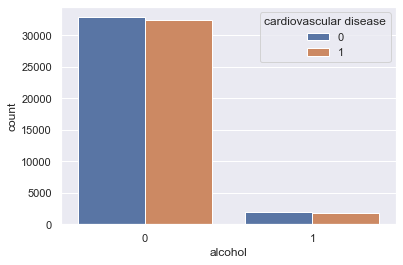

In [19]:
sns.countplot(x='alcohol', hue='cardiovascular disease', data=df_train)
plt.show()

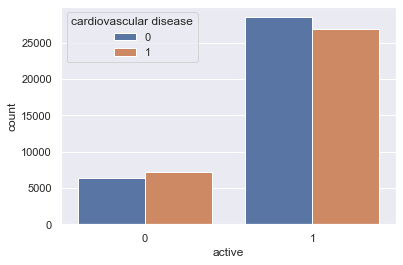

In [20]:
sns.countplot(x='active', hue='cardiovascular disease', data=df_train)
plt.show()

# Feature Construction

Make new columns: BMI and Pulse Pressure, since both are significant indicators of heart health. 
-> BMI = weight(kg) / height (cm) / height (cm) x 10,000 
-> Pulse Pressure = Systolic - Diastolic

Note that usually a pulse pressure of 60 or above is an indicator of poor heart health (possibiity of CVDs).

In [21]:
df_train['BMI'] = df_train['weight']/df_train['height']/df_train['height']*10000
df_train['Pulse Pressure'] = df_train['systolic']-df_train['diastolic']
df_train.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,Pulse Pressure
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40


In [22]:
# Check to see if CVDs relate with High BMI (>=100)
df_train[df_train['BMI'] >= 100 ].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,Pulse Pressure
6153,57.506849,1,122,161.0,120,80,1,1,0,0,1,1,108.169847,40
8171,48.345205,2,97,170.0,160,100,1,1,1,0,1,1,180.678074,60
12770,53.682192,1,75,168.0,120,80,1,1,1,0,1,1,298.666667,40
13265,61.523288,2,71,68.0,120,80,3,1,0,0,1,0,134.893870,40
14323,60.287671,1,67,57.0,120,90,1,1,0,0,1,1,126.977055,30
15167,43.320548,1,70,68.0,120,80,1,1,0,0,0,0,138.775510,40
15366,47.684932,1,125,167.0,180,90,1,2,0,0,1,1,106.880000,90
16699,53.917808,2,74,98.0,140,90,1,1,0,0,1,1,178.962747,50
20028,54.183562,1,112,167.0,180,120,1,1,0,1,1,0,133.131378,60
22542,39.830137,1,68,65.0,100,60,1,1,0,0,0,0,140.570934,40


In [23]:
# Check to see if CVDs relate with High Pulse Pressure (>=60)
df_train[df_train['Pulse Pressure'] >= 60 ].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,Pulse Pressure
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
16,58.345205,1,170,75.0,130,70,1,1,0,0,0,0,25.951557,60
22,63.139726,1,158,90.0,145,85,2,2,0,0,1,1,36.051915,60
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,60
29,57.690411,2,169,74.0,130,70,1,3,0,0,0,0,25.909457,60
43,56.317808,2,159,63.0,120,60,1,1,0,0,1,1,24.919900,60
44,54.147945,1,154,50.0,170,80,3,1,0,0,1,1,21.082813,90
46,49.882192,1,162,107.0,150,90,2,1,0,0,1,1,40.771224,60
59,55.975342,1,164,64.0,180,90,1,1,1,0,1,1,23.795360,90
61,57.424658,2,165,75.0,180,90,3,1,0,0,1,1,27.548209,90


In [24]:
# Check to see if CVDs relate with High Systolic BP (>500)
df_train[df_train['systolic'] > 120 ].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,Pulse Pressure
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
6,60.583562,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,50
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,40
14,39.813699,2,181,95.0,130,90,1,1,1,1,1,0,28.997894,40
16,58.345205,1,170,75.0,130,70,1,1,0,0,0,0,25.951557,60
21,58.665753,1,157,69.0,130,80,1,1,0,0,1,0,27.993022,50
22,63.139726,1,158,90.0,145,85,2,2,0,0,1,1,36.051915,60
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,60


In [25]:
# Check to see if CVDs relate with High Diasstolic BP (>400)
df_train[df_train['diastolic'] > 80 ].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,Pulse Pressure
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,40
14,39.813699,2,181,95.0,130,90,1,1,1,1,1,0,28.997894,40
22,63.139726,1,158,90.0,145,85,2,2,0,0,1,1,36.051915,60
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,60
25,39.597260,1,153,65.0,130,100,2,1,0,0,1,0,27.767098,30
26,53.586301,1,156,59.0,130,90,1,1,0,0,1,0,24.243918,40
31,63.523288,1,169,71.0,140,90,3,1,0,0,1,1,24.859074,50
33,56.580822,1,160,73.0,130,85,1,1,0,0,0,1,28.515625,45


In [26]:
# Check to see if CVDs relate with high cholesterollevel (level 3)
df_train[df_train['cholesterol'] == 3].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,Pulse Pressure
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
6,60.583562,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,50
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,40
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,60
30,50.112329,1,155,105.0,120,80,3,1,0,0,1,1,43.704475,40
31,63.523288,1,169,71.0,140,90,3,1,0,0,1,1,24.859074,50
34,60.109589,2,173,82.0,140,90,3,1,0,0,0,1,27.398176,50
44,54.147945,1,154,50.0,170,80,3,1,0,0,1,1,21.082813,90
53,39.745205,1,165,77.0,135,90,3,3,0,0,1,1,28.282828,45


In [27]:
#to see if CVD relate with both Pulse Pressure and Cholesterol
df_train[(df_train['Pulse Pressure'] >= 60 ) & (df_train['cholesterol'] == 3)].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,Pulse Pressure
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,60
44,54.147945,1,154,50.0,170,80,3,1,0,0,1,1,21.082813,90
61,57.424658,2,165,75.0,180,90,3,1,0,0,1,1,27.548209,90
194,60.243836,1,162,62.0,140,80,3,1,0,0,1,1,23.624447,60
221,48.194521,1,157,70.0,160,100,3,1,0,0,0,1,28.398718,60
230,64.043836,2,175,75.0,180,100,3,1,1,1,1,1,24.489796,80
275,53.819178,1,157,80.0,150,90,3,1,0,0,1,1,32.455678,60
280,55.843836,1,152,72.0,160,90,3,1,0,0,1,1,31.163435,70
299,63.991781,2,173,85.0,140,80,3,1,0,0,1,1,28.400548,60


# Feature Selection and Transformation

Drop the weight and height features since they are insignificant in predicting CVD presence. 

In [28]:
# Splitting data into training and testing datasets
X = df_train.drop(['weight', 'height', 'cardiovascular disease'], axis=1)
y = df_train['cardiovascular disease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model Training and Model Validation

Our goal in this project is to try different classification models (Naive Bayes, K-Nearest Neighbours, and Support Vector Machine), and spot the best performer among them based on their prediction accuracy.

The following code shows the Model Training and Model Validation processes for each of the three models of interest.

## Naive Bayes Model Investigation

In [30]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred_nbc = nbc.predict(X_test)

In [32]:
# Naive Bayes Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_nbc))
print(classification_report(y_test, y_pred_nbc))

[[8589 1753]
 [4251 6093]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74     10342
           1       0.78      0.59      0.67     10344

    accuracy                           0.71     20686
   macro avg       0.72      0.71      0.71     20686
weighted avg       0.72      0.71      0.71     20686



In [33]:
nbc.score(X_test, y_test)

0.709755390118921

### K-Fold cross-validation of Naive Bayes model

In [34]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_nbc = cross_val_score(estimator=nbc, X=X_train, y=y_train, cv=10)

In [35]:
accuracies_nbc

array([0.71369381, 0.70374974, 0.71472965, 0.71845867, 0.70810027,
       0.70478558, 0.70768593, 0.70430999, 0.71197679, 0.70886863])

In [36]:
accuracies_nbc.mean()

0.7096359054362587

In [37]:
accuracies_nbc.std()

0.00467996723286845

## K-Nearest Neighbor Model Investigation

In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [39]:
y_pred_knn = knn.predict(X_test)

In [40]:
# KNN Model Evaluation
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[8123 2219]
 [3408 6936]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10342
           1       0.76      0.67      0.71     10344

    accuracy                           0.73     20686
   macro avg       0.73      0.73      0.73     20686
weighted avg       0.73      0.73      0.73     20686



In [41]:
knn.score(X_test, y_test)

0.7279802765155178

### K-Fold cross-validation of KNN mode

In [42]:
#Applying k-Fold Cross Validation
accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

In [43]:
accuracies_knn

array([0.72695256, 0.72840273, 0.74083282, 0.74166149, 0.73233893,
       0.73088875, 0.7331676 , 0.72337339, 0.72668877, 0.72523829])

In [44]:
accuracies_knn.mean()

0.7309545328455742

In [45]:
accuracies_knn.std()

0.005915328891249685

## SVM Model Investigation

In [46]:
#SVM
from sklearn import svm
svm = svm.SVC(gamma=0.001, C=100., kernel = 'linear')
svm.fit(X_train, y_train) 

SVC(C=100.0, gamma=0.001, kernel='linear')

In [47]:
y_pred_svc = svm.predict(X_test)

In [48]:
# SVM Model Evaluation
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[8449 1893]
 [3842 6502]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10342
           1       0.77      0.63      0.69     10344

    accuracy                           0.72     20686
   macro avg       0.73      0.72      0.72     20686
weighted avg       0.73      0.72      0.72     20686



In [49]:
svm.score(X_test, y_test)

0.722759354152567

### K-Fold cross-validation of SVM model

In [50]:
#Applying k-Fold Cross Validation
accuracies_svm = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10, n_jobs=4)

In [51]:
accuracies_svm

array([0.72840273, 0.72570955, 0.73006008, 0.73151025, 0.72695256,
       0.72094469, 0.72425937, 0.71570659, 0.72295897, 0.71860754])

In [52]:
accuracies_svm.mean()

0.7245112341641604

In [53]:
accuracies_svm.std()

0.004794625430670442

# Model Comparison

In [54]:
model = ['Naive Bayes','KNN','SVM']
scores = [accuracies_nbc.mean(),accuracies_knn.mean(),accuracies_svm.mean()]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by='Mean Accuracy', ascending=False)

,Mean Accuracy
KNN,0.730955
SVM,0.724511
Naive Bayes,0.709636


From the summary table above, we can conclude that the KNN classfication model performed the best in terms of its prediction accuracy. 

# Highly Predictive Feature (SVM)

To determine which among the features contributed the most in terms of CVDs prediction, we can make use of the coef_ attribute for the SVM classifier, as shown in the code below followed by a bar graph illustrating the significance of each feature.

<AxesSubplot:>

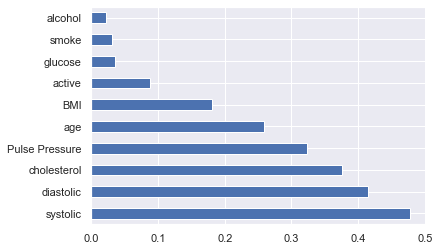

In [70]:
pd.Series(abs(svm.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

From the bar graph above, it can be concluded that the systolic blood pressure is the most highly predictive feature for CVDs.

In [71]:
svm.coef_

array([[ 0.25885552,  0.0141703 ,  0.47759323,  0.4138735 ,  0.37624171,
        -0.03522407, -0.03098579, -0.02144038, -0.08859882,  0.18051903,
         0.32250302]])

Now let's try to use a Lasso Regression model, just to verify if the lasso coefficients also suggests the same results from the bar graph of feature CVD predictiveness above.

In [72]:
# trying lasso regression
from sklearn.linear_model import LassoCV
lasso = LassoCV(fit_intercept=True,alphas=2**np.linspace(3,-7,100)*0.5,cv=5)
lasso.fit(X_train,y_train)
lassoModelpred = lasso.predict(X_test)

In [73]:
# Checing the coefficients of each feature from the Lasso Model
pd.Series(lasso.coef_,index=X.columns)#.nlargest(10).plot(kind='barh')

age               0.071303
gender            0.000000
systolic          0.129834
diastolic         0.052185
cholesterol       0.061406
glucose          -0.004438
smoke            -0.004262
alcohol          -0.003644
active           -0.014825
BMI               0.026334
Pulse Pressure    0.000000
dtype: float64

<AxesSubplot:>

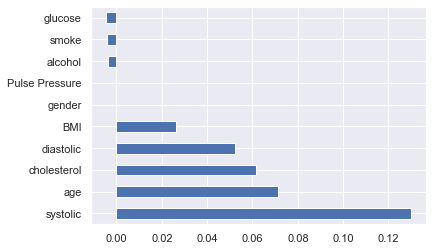

In [74]:
pd.Series(lasso.coef_,index=X.columns).nlargest(10).plot(kind='barh')

Indeed the systolic obtained the highest coefficient from fitting a Lasso Regression model into the dataset. While as expected from the bar graphs, the features 'gender', 'glucose', 'smoke', 'alcohol', and 'active' had the least significance in CVD prediction. 